
# 1. ***Data Cleaning and Preparation***
---

1.   Loading Data
2.   Handling Missing Values
3.   Data Transformation
4.   Data Splitting

---
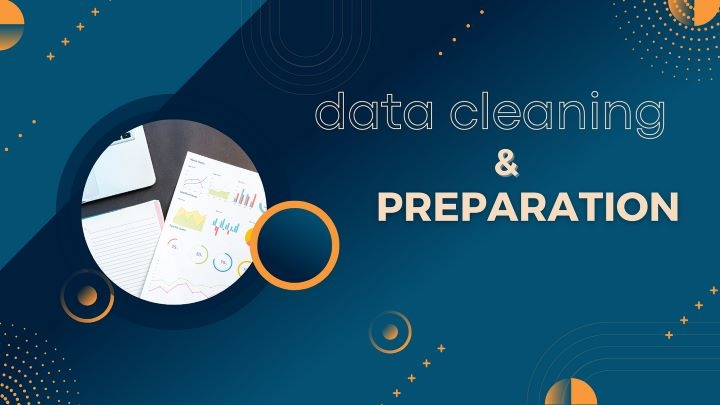






# 1.1. Loading Data

---

 - Load the datasets.
 - Display the first few rows of each dataset to understand its structure.



In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**importing necessary libraries**


*   NumPy (for numerical evaluation)
*   Pandas (to manipulate datasets)
*   MatPlotLib (for visualization of data)
*   sklearn (for data transformation and other preprocessing operations)





In [ ]:
# loading dataset
Car_data="/content/drive/MyDrive/Week # 6/Regression/pakwheels_used_cars.csv"
dataset=pd.read_csv(Car_data)

* *Imported the dataset of weather_classification and read it via Pandas*

In [ ]:
#showing first few rows of the dataset
dataset.head()

ad_ref  assembly       body ad_city                color  engine_cc  \
0  7927285  Imported        Van  Lahore          Pearl White     2000.0   
1  7679303  Imported  Hatchback  Lahore                 Grey      996.0   
2  7915479       NaN      Sedan  Lahore          Super white     1798.0   
3  7918380       NaN      Sedan  Lahore  Crystal Black Pearl     1500.0   
4  7676167  Imported        MPV  Lahore               Silver     3000.0   

  fuel_type    make  mileage    model     registered transmission    year  \
0    Hybrid  Nissan   124000   Serena  Un-Registered    Automatic  1905.0   
1    Petrol  Toyota    30738     Vitz         Punjab    Automatic  1905.0   
2    Petrol  Toyota   183000  Corolla         Punjab    Automatic  1905.0   
3    Petrol   Honda    41000    Civic         Punjab    Automatic  1905.0   
4    Petrol  Toyota   126000  Alphard         Punjab    Automatic  1905.0   

       price  
0  8990000.0  
1  4190000.0  
2  3990000.0  
3  6490000.0  
4  4750000.0

In [ ]:
# getting the shape of the dataset
dataset.shape

(77237, 14)

* It indicates that the given dataset has:

     Total Rows= 77237
     
     Total Columns= 14



# 1.2. Handling Missing Values


---

* Identify and handle missing values in both datasets.
* Provide a justification for the methods used to handle missing data.

In [ ]:
#getting missing values
na_col=dataset.isnull().sum()
na_row= dataset.isnull().sum(axis=1)

#printing stats of missing values
print(f"The number of missing values in columns are:\n{na_col}")
print(f"\n{'-'*50}\n")
print(f"The number of missing values in rows are:\n{na_row}")

The number of missing values in columns are:
ad_ref              0
assembly        53261
body             8865
ad_city             0
color            1510
engine_cc           2
fuel_type         934
make                0
mileage             0
model               0
registered          0
transmission        0
year             4721
price             649
dtype: int64

--------------------------------------------------

The number of missing values in rows are:
0        0
1        0
2        1
3        1
4        0
        ..
77232    1
77233    1
77234    1
77235    2
77236    1
Length: 77237, dtype: int64


In [ ]:
# dropping the rows with missing values
dropped_df=dataset.copy()
dropped_df.dropna(axis=0,inplace=True)
print(f"The shape of new dataset after dropping the rows with missing values is:\n{dropped_df.shape}")
print('-'*50)
print("The dataset after dropping the rows with missing values is:\n")
print('-'*50)
dropped_df


The shape of new dataset after dropping the rows with missing values is:
(16168, 14)
--------------------------------------------------
The dataset after dropping the rows with missing values is:

--------------------------------------------------


ad_ref  assembly       body    ad_city        color  engine_cc  \
0      7927285  Imported        Van     Lahore  Pearl White     2000.0   
1      7679303  Imported  Hatchback     Lahore         Grey      996.0   
4      7676167  Imported        MPV     Lahore       Silver     3000.0   
5      7908190  Imported        SUV     Lahore        White     2700.0   
7      7900746  Imported        Van     Lahore        Black     2000.0   
...        ...       ...        ...        ...          ...        ...   
77202  7499054  Imported  Hatchback  Islamabad     Unlisted     1000.0   
77205  7756215  Imported  Crossover  Islamabad        White     1500.0   
77208  7757605  Imported  Hatchback    Sialkot       Silver      660.0   
77211  7757642  Imported  Hatchback    Karachi         Grey     1000.0   
77219  7847675  Imported  Hatchback    Karachi       Silver     1000.0   

      fuel_type      make  mileage    model     registered transmission  \
0        Hybrid    Nissan   124000   Serena  Un-Registered    Automatic   
1        Petrol    Toyota    30738     Vitz         Punjab    Automatic   
4        Petrol    Toyota   126000  Alphard         Punjab    Automatic   
5        Petrol    Toyota    34000    Prado  Un-Registered    Automatic   
7        Hybrid    Nissan    97000   Serena  Un-Registered    Automatic   
...         ...       ...      ...      ...            ...          ...   
77202    Petrol    Toyota   118000    Passo      Islamabad    Automatic   
77205    Petrol     Honda    54000    Vezel  Un-Registered    Automatic   
77208    Petrol  Daihatsu   109902     Mira         Punjab    Automatic   
77211    Petrol    Suzuki    70000   Cultus        Karachi       Manual   
77219    Petrol    Toyota    94890    Passo        Karachi    Automatic   

         year       price  
0      1905.0   8990000.0  
1      1905.0   4190000.0  
4      1905.0   4750000.0  
5      1905.0  28900000.0  
7      1905.0   7700000.0  
...       ...         ...  
77202  1905.0   2095000.0  
77205  1905.0   7600000.0  
77208  1905.0   2150000.0  
77211  1905.0   1170000.0  
77219  1905.0   2300000.0  

[16168 rows x 14 columns]

In [ ]:

filled_df=dataset.copy()

enc_col=dataset.select_dtypes(include='object').columns
for col in filled_df:
  if col in enc_col:
    most_frequent = filled_df[col].mode()[0]
    filled_df[col].fillna(most_frequent, inplace=True)

  elif col not in enc_col:
  # Impute missing values for numerical columns with mean
    filled_df[col].fillna(filled_df[col].mean(), inplace=True)

print(f"The shape of new dataset after filling the rows with frequently used labeled values for categorical columns and median value for numerical columns is:\n{filled_df.shape}")
print('-'*50)
print(f"The dataset after filling the rows with frequently used labeled values for categorical columns and median value for numerical columns is:\n{'-'*50}")

filled_df


The shape of new dataset after filling the rows with frequently used labeled values for categorical columns and median value for numerical columns is:
(77237, 14)
--------------------------------------------------
The dataset after filling the rows with frequently used labeled values for categorical columns and median value for numerical columns is:
--------------------------------------------------


ad_ref  assembly       body     ad_city                color  \
0      7927285  Imported        Van      Lahore          Pearl White   
1      7679303  Imported  Hatchback      Lahore                 Grey   
2      7915479  Imported      Sedan      Lahore          Super white   
3      7918380  Imported      Sedan      Lahore  Crystal Black Pearl   
4      7676167  Imported        MPV      Lahore               Silver   
...        ...       ...        ...         ...                  ...   
77232  7727137  Imported  Micro Van  Gujranwala                Black   
77233  7733253  Imported      Sedan     Karachi          Super White   
77234  7719906  Imported  Micro Van  Gujranwala               Silver   
77235  7627128  Imported      Sedan   Islamabad                 Blue   
77236  7758009  Imported      Sedan     Karachi        Taffeta White   

       engine_cc fuel_type    make  mileage    model     registered  \
0         2000.0    Hybrid  Nissan   124000   Serena  Un-Registered   
1          996.0    Petrol  Toyota    30738     Vitz         Punjab   
2         1798.0    Petrol  Toyota   183000  Corolla         Punjab   
3         1500.0    Petrol   Honda    41000    Civic         Punjab   
4         3000.0    Petrol  Toyota   126000  Alphard         Punjab   
...          ...       ...     ...      ...      ...            ...   
77232      660.0    Petrol  Suzuki    45000    Every  Un-Registered   
77233     1500.0    Petrol  Toyota    18000    Yaris        Karachi   
77234      660.0    Petrol  Suzuki    70000    Every  Un-Registered   
77235     1800.0    Petrol  Toyota   135600  Corolla      Islamabad   
77236     1800.0    Petrol   Honda    30000    Civic          Sindh   

      transmission    year         price  
0        Automatic  1905.0  8.990000e+06  
1        Automatic  1905.0  4.190000e+06  
2        Automatic  1905.0  3.990000e+06  
3        Automatic  1905.0  6.490000e+06  
4        Automatic  1905.0  4.750000e+06  
...            ...     ...           ...  
77232       Manual  1905.0  3.854193e+06  
77233    Automatic  1905.0  4.825000e+06  
77234    Automatic  1905.0  3.854193e+06  
77235    Automatic  1905.0  3.854193e+06  
77236    Automatic  1905.0  6.500000e+06  

[77237 rows x 14 columns]

**Comparison of .dropna() and fillna()**


---


    For .dropna() method:
         The number of rows decreases from 77237 to 16168
         It results in 79.05% loss in the data in the given dataset
         It is a huge loss ,thus affecting the accuracy of the model since larger the dataset (the model is trained on), greater the efficiency of the model        

---
    For .fillna() method:
        The number of rows remains same i.e., 77237
        It results in NO loss in the data in the given dataset
        However,we've to compromise on the accuracy of the model because the filled values may or may not be correct, thus affecting the accuracy of the model        

---
    Given the conditions outlined:
        Best Approach: Use the .fillna() method.

        Justification:
        
            The significant loss of data from using .dropna() (79.05%) is detrimental to model training and accuracy.
            
            Maintaining a larger dataset is generally more beneficial for model performance, even if it means accepting some level of imputation error.
            
            While imputed values may introduce some inaccuracies, the trade-off of retaining the full dataset size is likely to yield better overall model performance and robustness.      

In [ ]:
#Creating copy the original dataset soas to use in EDA later
orig_dataset=dataset.copy()
# Coping the outcome of .fillna() into the original dataset
dataset=filled_df.copy()
print(f"The shape of the new dataset after handling missing values is:\n{dataset.shape}")
print('-'*50)
print(f"The the new dataset after handling missing values is:\n{'-'*50}")

dataset


The shape of the new dataset after handling missing values is:
(77237, 14)
--------------------------------------------------
The the new dataset after handling missing values is:
--------------------------------------------------


ad_ref  assembly       body     ad_city                color  \
0      7927285  Imported        Van      Lahore          Pearl White   
1      7679303  Imported  Hatchback      Lahore                 Grey   
2      7915479  Imported      Sedan      Lahore          Super white   
3      7918380  Imported      Sedan      Lahore  Crystal Black Pearl   
4      7676167  Imported        MPV      Lahore               Silver   
...        ...       ...        ...         ...                  ...   
77232  7727137  Imported  Micro Van  Gujranwala                Black   
77233  7733253  Imported      Sedan     Karachi          Super White   
77234  7719906  Imported  Micro Van  Gujranwala               Silver   
77235  7627128  Imported      Sedan   Islamabad                 Blue   
77236  7758009  Imported      Sedan     Karachi        Taffeta White   

       engine_cc fuel_type    make  mileage    model     registered  \
0         2000.0    Hybrid  Nissan   124000   Serena  Un-Registered   
1          996.0    Petrol  Toyota    30738     Vitz         Punjab   
2         1798.0    Petrol  Toyota   183000  Corolla         Punjab   
3         1500.0    Petrol   Honda    41000    Civic         Punjab   
4         3000.0    Petrol  Toyota   126000  Alphard         Punjab   
...          ...       ...     ...      ...      ...            ...   
77232      660.0    Petrol  Suzuki    45000    Every  Un-Registered   
77233     1500.0    Petrol  Toyota    18000    Yaris        Karachi   
77234      660.0    Petrol  Suzuki    70000    Every  Un-Registered   
77235     1800.0    Petrol  Toyota   135600  Corolla      Islamabad   
77236     1800.0    Petrol   Honda    30000    Civic          Sindh   

      transmission    year         price  
0        Automatic  1905.0  8.990000e+06  
1        Automatic  1905.0  4.190000e+06  
2        Automatic  1905.0  3.990000e+06  
3        Automatic  1905.0  6.490000e+06  
4        Automatic  1905.0  4.750000e+06  
...            ...     ...           ...  
77232       Manual  1905.0  3.854193e+06  
77233    Automatic  1905.0  4.825000e+06  
77234    Automatic  1905.0  3.854193e+06  
77235    Automatic  1905.0  3.854193e+06  
77236    Automatic  1905.0  6.500000e+06  

[77237 rows x 14 columns]

# 1.3. Data Transformation
   - Convert categorical variables to numerical variables using appropriate encoding techniques (e.g., one-hot encoding, label encoding).
   - Normalize/standardize the numerical features.


In [ ]:
# showing labels of categorical columns
for col in  enc_col:
  print(f"The labels of {col} are:\n\n{dataset[col].unique()}\n{'-'*50}\n")

The labels of assembly are:

['Imported']
--------------------------------------------------

The labels of body are:

['Van' 'Hatchback' 'Sedan' 'MPV' 'SUV' 'Crossover' 'Compact SUV'
 'Double Cabin' 'Micro Van' 'Mini Van' 'Compact sedan' 'Station Wagon'
 'Pick Up' 'Convertible' 'Truck' 'High Roof' 'Coupe' 'Off-Road Vehicles'
 'Compact hatchback' 'Single Cabin' 'Mini Vehicles']
--------------------------------------------------

The labels of ad_city are:

['Lahore' 'Sialkot' 'Multan' 'Islamabad' 'Karachi' 'Faisalabad' 'Tibba'
 'Sargodha' 'Peshawar' 'Rawalpindi' 'Daharki' 'Pasrur' 'Gujrat' 'Chakwal'
 'Mian' 'Gujranwala' 'Nowshera' 'Mardan' 'Rahim' 'Okara' 'Attock' 'Wah'
 'Sahiwal' 'Bahawalpur' 'Mandi' 'Jhelum' 'New' 'Hyderabad' 'Quetta'
 'Abbottabad' 'Shah' 'Swabi' 'Nankana' 'Toba' 'Mirpur' 'Hazro' 'Lala'
 'Sadiqabad' 'Chishtian' 'Bannu' 'Mansehra' 'Muzaffarabad' 'Charsadda'
 'Fateh' 'Arifwala' 'Sheikhupura' 'Talagang' 'Akora' 'Burewala' 'Liaqat'
 'Phalia' 'Pattoki' 'Ranipur' 'Muzaffar

In [ ]:
# Using the LabelEncoder encoding technique for categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in enc_col:
  dataset[col]=le.fit_transform(dataset[col])

print(f"The the new dataset after LabelEncoder Technique is:\n{'-'*50}")
dataset

The the new dataset after LabelEncoder Technique is:
--------------------------------------------------


ad_ref  assembly  body  ad_city  color  engine_cc  fuel_type  make  \
0      7927285         0    20      160    246     2000.0          1    47   
1      7679303         0     7      160    162      996.0          2    63   
2      7915479         0    16      160    339     1798.0          2    63   
3      7918380         0    16      160     95     1500.0          2    28   
4      7676167         0     9      160    303     3000.0          2    63   
...        ...       ...   ...      ...    ...        ...        ...   ...   
77232  7727137         0    10       80     33      660.0          2    61   
77233  7733253         0    16      130    336     1500.0          2    63   
77234  7719906         0    10       80    303      660.0          2    61   
77235  7627128         0    16      101     45     1800.0          2    63   
77236  7758009         0    16      130    342     1800.0          2    28   

       mileage  model  registered  transmission    year         price  
0       124000    333         123             0  1905.0  8.990000e+06  
1        30738    398          98             0  1905.0  4.190000e+06  
2       183000    121          98             0  1905.0  3.990000e+06  
3        41000    110          98             0  1905.0  6.490000e+06  
4       126000     35          98             0  1905.0  4.750000e+06  
...        ...    ...         ...           ...     ...           ...  
77232    45000    147         123             1  1905.0  3.854193e+06  
77233    18000    419          57             0  1905.0  4.825000e+06  
77234    70000    147         123             0  1905.0  3.854193e+06  
77235   135600    121          49             0  1905.0  3.854193e+06  
77236    30000    110         115             0  1905.0  6.500000e+06  

[77237 rows x 14 columns]

In [ ]:
#getting the shape of encoded dataset
print(f"The shape of the encoded dataset is:\n{dataset.shape}")

The shape of the encoded dataset is:
(77237, 14)


**Reason for using LabelEncoder instead of OneHot Encoder**

    One-Hot Encoding Technique would increase the number of columns from 14 to 1344
    It'll make it quite difficult to handle such an enormous data
---
    Thus, using LabelEncoder module from sklearn.preprocessing makes it easier to keep the number of columns intact.

In [ ]:
#Standardizing the dataset
from sklearn.preprocessing import StandardScaler #importing the required module
scaler= StandardScaler() #creating object of  StandardScalar
for col in dataset:
  dataset[[col]]=scaler.fit_transform(dataset[[col]])

print(f"The the new dataset after Standardizing the encoded dataset is:\n{'-'*70}")

dataset

The the new dataset after Standardizing the encoded dataset is:
----------------------------------------------------------------------


ad_ref  assembly      body   ad_city     color  engine_cc  fuel_type  \
0      0.505167       0.0  1.689100  0.209604 -0.004966   0.838758  -1.958718   
1     -0.459871       0.0 -1.129358  0.209604 -0.681257  -0.580020   0.281951   
2      0.459223       0.0  0.821882  0.209604  0.743785   0.553306   0.281951   
3      0.470512       0.0  0.821882  0.209604 -1.220680   0.132195   0.281951   
4     -0.472075       0.0 -0.695749  0.209604  0.453946   2.251883   0.281951   
...         ...       ...       ...       ...       ...        ...        ...   
77232 -0.273722       0.0 -0.478945 -1.095438 -1.719847  -1.054830   0.281951   
77233 -0.249921       0.0  0.821882 -0.279787  0.719632   0.132195   0.281951   
77234 -0.301862       0.0 -0.478945 -1.095438  0.453946  -1.054830   0.281951   
77235 -0.662913       0.0  0.821882 -0.752865 -1.623234   0.556132   0.281951   
77236 -0.153581       0.0  0.821882 -0.279787  0.767938   0.556132   0.281951   

           make   mileage     model  registered  transmission  year  \
0     -0.119689  0.364565  1.382178    1.785641     -0.915717   0.0   
1      0.797448 -0.675092  1.976229    0.843306     -0.915717   0.0   
2      0.797448  1.022280 -0.555340    0.843306     -0.915717   0.0   
3     -1.208790 -0.560694 -0.655871    0.843306     -0.915717   0.0   
4      0.797448  0.386861 -1.341314    0.843306     -0.915717   0.0   
...         ...       ...       ...         ...           ...   ...   
77232  0.682806 -0.516103 -0.317720    1.785641      1.092040   0.0   
77233  0.797448 -0.817091  2.168152   -0.702122     -0.915717   0.0   
77234  0.682806 -0.237411 -0.317720    1.785641     -0.915717   0.0   
77235  0.797448  0.493879 -0.555340   -1.003669     -0.915717   0.0   
77236 -1.208790 -0.683319 -0.655871    1.484094     -0.915717   0.0   

              price  
0      9.247953e-01  
1      6.046822e-02  
2      2.445459e-02  
3      4.746249e-01  
4      1.613064e-01  
...             ...  
77232  8.385076e-17  
77233  1.748115e-01  
77234  8.385076e-17  
77235  8.385076e-17  
77236  4.764256e-01  

[77237 rows x 14 columns]

**3.2 Normalization and Standardization**


* Normalization and standardization are techniques used to scale numerical features to a common range.
* This is often necessary when the features have different scales or units, as some machine learning algorithms are sensitive to the scale of the input features.

**1. Normalization (Min-Max Scaling)**


Normalization scales the features to a common range, typically between 0 and 1. This is done by subtracting the minimum value and dividing by the range (maximum - minimum) of the feature.
python.

**2. Standardization (Z-score Normalization)**

Standardization scales the features to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean and dividing by the standard deviation of the feature.

\

**Choice between Normalization (Min-Max Scaling) and Standardization (Z-score Normalization)**

**Algorithm Sensitivity**:

* **Normalization (Min-Max Scaling):** Suitable for algorithms that are not sensitive to the scale of the features, such as decision trees and random forests.
* **Standardization (Z-score Normalization):** Preferred for algorithms that are sensitive to the scale of the features, such as linear regression, logistic regression, and neural networks, as it can improve the convergence of the optimization algorithms.

>>Since this model is for  *'Linear Regression'*   , thus, choosing  **Standardization (Z-score Normalization)** over **Normalization (Min-Max Scaling)**


>>it results in NO increament in the number of columns because no new column is formed .The already-existed columns are encoded/modified

# 1.4. Data Splitting:
   - Split the data into training and testing sets using an 80-20 split


In [ ]:
#defining features and target
X=dataset.drop(['price'],axis=1)
Y=dataset['price']

#importing test_train_split
from sklearn.model_selection import train_test_split as tts

#data spliting into x_train,x_test,y_train ,y_test
x_train,x_test,y_train ,y_test=tts(X,Y,test_size=0.2,random_state=1)

**Importance of Data Spliting**

There are a few key reasons why the 80-20 split is a commonly used approach for splitting data into training and testing sets:

1. **Model Generalization**: The primary purpose of splitting the data is to evaluate how well the model will generalize to new, unseen data.
2. **Variance Reduction**: With less training data, the parameter estimates of the model will have higher variance. Conversely, with less testing data, the performance metrics calculated on the test set will have higher variance.
3. **Computational Efficiency**: Splitting the data 80-20 is computationally efficient, as it requires *training the model* only once on the training set, and then *evaluating* it once on the test set.


The output of train_test_split() is four variables:
* X_train: The feature data for the training set.
* X_test: The feature data for the testing set.
* y_train: The target variable data for the training set.
* y_test: The target variable data for the testing set.

In [ ]:
#getting shape of x_train,x_test,y_train ,y_test
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {Y.shape}')
print('-'*50)
print(f'Shape of X_Train: {x_train.shape}')
print(f'Shape of Y_Train: {y_train.shape}')
print('-'*50)
print(f'Shape of X_Test: {x_test.shape}')
print(f'Shape of Y_Test: {y_test.shape}')

Shape of X: (77237, 13)
Shape of Y: (77237,)
--------------------------------------------------
Shape of X_Train: (61789, 13)
Shape of Y_Train: (61789,)
--------------------------------------------------
Shape of X_Test: (15448, 13)
Shape of Y_Test: (15448,)


# 2. ***Data Analysis and Visualization***


---

1. Exploratory Data Analysis (EDA)
2. Visualization



---

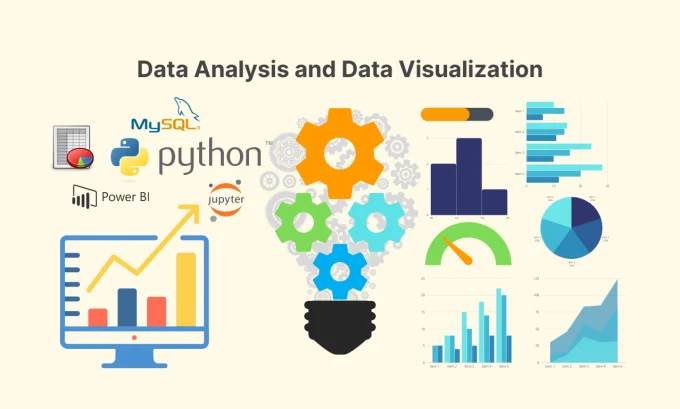


# 2.1.  Exploratory Data Analysis (EDA)


---


   - Perform EDA on the datasets to identify key patterns, correlations, and insights.
   - Generate summary statistics (mean, median, standard deviation, etc.) for the datasets.
   - Identify any patterns, correlations, or anomalies in the data.


In [ ]:
# Generate summary statistics for each column in the dataset
for col in orig_dataset.columns:
    print(f'For {col} : \n')
    print(orig_dataset[col].describe())
    print('-'*50)

For ad_ref : 

count    7.723700e+04
mean     7.797474e+06
std      2.569679e+05
min      2.748970e+05
25%      7.792632e+06
50%      7.853515e+06
75%      7.897048e+06
max      7.931906e+06
Name: ad_ref, dtype: float64
--------------------------------------------------
For assembly : 

count        23976
unique           1
top       Imported
freq         23976
Name: assembly, dtype: object
--------------------------------------------------
For body : 

count     68372
unique       21
top       Sedan
freq      29951
Name: body, dtype: object
--------------------------------------------------
For ad_city : 

count      77237
unique       297
top       Lahore
freq       16418
Name: ad_city, dtype: object
--------------------------------------------------
For color : 

count     75727
unique      386
top       White
freq      21324
Name: color, dtype: object
--------------------------------------------------
For engine_cc : 

count    77235.000000
mean      1406.452062
std        707.6651

In [ ]:
# Generate summary statistics for numerical features
orig_dataset.describe()

ad_ref     engine_cc         mileage     year         price
count  7.723700e+04  77235.000000    77237.000000  72516.0  7.658800e+04
mean   7.797474e+06   1406.452062    91296.829589   1905.0  3.854193e+06
std    2.569679e+05    707.665165    89705.138633      0.0  5.576970e+06
min    2.748970e+05      3.000000        1.000000   1905.0  1.200000e+05
25%    7.792632e+06   1000.000000    34000.000000   1905.0  1.425000e+06
50%    7.853515e+06   1300.000000    80000.000000   1905.0  2.650000e+06
75%    7.897048e+06   1600.000000   123456.000000   1905.0  4.500000e+06
max    7.931906e+06  15000.000000  1000000.000000   1905.0  1.800000e+08

In [ ]:
#getting info of dataset
orig_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77237 entries, 0 to 77236
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ad_ref        77237 non-null  int64  
 1   assembly      23976 non-null  object 
 2   body          68372 non-null  object 
 3   ad_city       77237 non-null  object 
 4   color         75727 non-null  object 
 5   engine_cc     77235 non-null  float64
 6   fuel_type     76303 non-null  object 
 7   make          77237 non-null  object 
 8   mileage       77237 non-null  int64  
 9   model         77237 non-null  object 
 10  registered    77237 non-null  object 
 11  transmission  77237 non-null  object 
 12  year          72516 non-null  float64
 13  price         76588 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.2+ MB


In [ ]:
#checking for duplicate values
orig_dataset.duplicated().sum()

0

In [52]:
#checking for correlation matrix
#dataset.isnull().sum(axis=1)
cor_mat=dataset.drop(columns=[col for col in dataset.columns if dataset[col].nunique()==1]).corr()
cor_mat

ad_ref      body   ad_city     color  engine_cc  fuel_type  \
ad_ref        1.000000 -0.008343  0.003495  0.012859  -0.055820   0.040570   
body         -0.008343  1.000000  0.000041 -0.038065   0.351570  -0.010369   
ad_city       0.003495  0.000041  1.000000  0.007956  -0.018514   0.004042   
color         0.012859 -0.038065  0.007956  1.000000  -0.091004   0.058967   
engine_cc    -0.055820  0.351570 -0.018514 -0.091004   1.000000  -0.396774   
fuel_type     0.040570 -0.010369  0.004042  0.058967  -0.396774   1.000000   
make          0.016850 -0.078637  0.016326  0.065866  -0.029512  -0.104065   
mileage       0.004985  0.141790  0.000546 -0.062220   0.044260  -0.035364   
model        -0.017467 -0.216498 -0.004164 -0.004496   0.013366  -0.074172   
registered   -0.005509 -0.074278  0.026994 -0.004761  -0.034347  -0.031360   
transmission  0.028915 -0.113022  0.010768  0.040870  -0.297591   0.098653   
price        -0.032185  0.104401 -0.024164 -0.030547   0.466963  -0.158342   

                  make   mileage     model  registered  transmission     price  
ad_ref        0.016850  0.004985 -0.017467   -0.005509      0.028915 -0.032185  
body         -0.078637  0.141790 -0.216498   -0.074278     -0.113022  0.104401  
ad_city       0.016326  0.000546 -0.004164    0.026994      0.010768 -0.024164  
color         0.065866 -0.062220 -0.004496   -0.004761      0.040870 -0.030547  
engine_cc    -0.029512  0.044260  0.013366   -0.034347     -0.297591  0.466963  
fuel_type    -0.104065 -0.035364 -0.074172   -0.031360      0.098653 -0.158342  
make          1.000000  0.027615  0.113317   -0.000474      0.185995 -0.035515  
mileage       0.027615  1.000000 -0.055816   -0.088898      0.146532 -0.183085  
model         0.113317 -0.055816  1.000000    0.029775     -0.098011  0.062357  
registered   -0.000474 -0.088898  0.029775    1.000000     -0.027496  0.078601  
transmission  0.185995  0.146532 -0.098011   -0.027496      1.000000 -0.344702  
price        -0.035515 -0.183085  0.062357    0.078601     -0.344702  1.000000

**Definition of Correlation Matrix**


* A correlation matrix is a table that displays the correlation coefficients between multiple variables.
* Each cell in the matrix shows the correlation between two variables, ranging from -1 to 1:

      1 indicates a perfect positive correlation (as one variable increases, the other also increases).

      -1 indicates a perfect negative correlation (as one variable increases, the other decreases).

      0 indicates no correlation.
---
**Summary of Strongest and Weakest Correlations**


    Engine Capacity (engine_cc):
        Strongest positive correlation: Price (0.467)
        Strongest negative correlation: Fuel Type (-0.397)
        Weakest correlation: Model (0.013)


    Transmission:
        Strongest negative correlation: Price (-0.345)
        Strongest positive correlation: Make (0.186)
        Weakest correlation: Registered (-0.027)


    Body Type (body):
        Strongest positive correlation: Engine Capacity (0.352)
        Strongest negative correlation: Model (-0.216)
        Weakest correlation: Ad City (0.00004)


    Mileage:
        Strongest positive correlation: Body Type (0.142)
        Strongest negative correlation: Price (-0.183)
        Weakest correlation: Ad City (0.0005)


    Price:
        Strongest positive correlation: Engine Capacity (0.467)
        Strongest negative correlation: Transmission (-0.345)
        Weakest correlation: Ad City (-0.024)

**Conclusion**

      The correlation matrix highlights the strongest and weakest relationships between the variables.
      
      The strongest correlations are between Engine Capacity and Price, and Transmission and Price.
      
      The weakest correlations are mostly related to Ad City, indicating that the ad city has minimal influence on the other variables.

In [55]:
# analyzing categorical columns in the orig_dataset
for col in enc_col:
    print(f'For {col} : \n')
    print(orig_dataset[col].value_counts())
    print('-'*50)

For assembly : 

assembly
Imported    23976
Name: count, dtype: int64
--------------------------------------------------
For body : 

body
Sedan                29951
Hatchback            24868
SUV                   5001
Crossover             2135
Mini Van              1324
Compact sedan          771
MPV                    764
Double Cabin           751
Van                    735
Pick Up                520
Micro Van              516
Compact SUV            462
Station Wagon          231
Coupe                   89
Truck                   85
High Roof               75
Convertible             45
Single Cabin            25
Off-Road Vehicles       12
Mini Vehicles            8
Compact hatchback        4
Name: count, dtype: int64
--------------------------------------------------
For ad_city : 

ad_city
Lahore        16418
Karachi       14364
Islamabad     11344
Rawalpindi     5352
Peshawar       3634
              ...  
Gakhar            1
Bhan              1
Lasbela           1
Jatlaan      

In [59]:
# analyzing UNIQUE PATTERNS categorical columns in the orig_dataset
unique_paterns=orig_dataset[[col for col in enc_col]].value_counts()
unique_paterns

assembly  body       ad_city    color                   fuel_type  make      model  registered     transmission
Imported  Hatchback  Karachi    Silver                  Petrol     Toyota    Vitz   Karachi        Automatic       46
                     Islamabad  Silver                  Petrol     Toyota    Vitz   Islamabad      Automatic       44
                     Karachi    Silver                  Petrol     Daihatsu  Mira   Karachi        Automatic       42
                     Lahore     Silver                  Petrol     Toyota    Vitz   Lahore         Automatic       42
                     Karachi    White                   Petrol     Daihatsu  Mira   Karachi        Automatic       41
                                                                                                                   ..
                     Peshawar   Bluish Black Pearl      Petrol     Suzuki    Wagon  Sindh          Automatic        1
                                                              

**The key insights from this output are:**

* The most frequent combination is "Imported, Hatchback, Karachi, Silver, Petrol, Toyota, Vitz, Karachi, Automatic" with a count of 46. This indicates that this specific configuration of vehicle attributes is the most common in the dataset.

* The next most frequent combinations are "Imported, Hatchback, Islamabad, Silver, Petrol, Toyota, Vitz, Islamabad, Automatic" with a count of 44.

* Imported, Hatchback, Karachi, Silver, Petrol, Daihatsu, Mira, Karachi, Automatic" and "Imported, Hatchback, Lahore, Silver, Petrol, Toyota, Vitz, Lahore, Automatic" with a count of 42 each.

* "Imported, Hatchback, Karachi, White, Petrol, Daihatsu, Mira, Karachi, Automatic" with a count of 41.



>> Total number of unique combinations of the specified categorical variables is 10,675.


>> This analysis helps in understanding the distribution and prevalence of different vehicle attributes within the dataset, which can be valuable for further analysis, such as market trends or customer preferences.

# 2.2.  Visualization
---
>> Create various plots to visualize data:
* Histograms: To show the distribution of individual features.
* Scatter Plots: To show relationships between pairs of features.
* Box Plots: To identify outliers and understand the spread of data.
* Correlation Heatmaps: To visualize correlations between features.

---

>> Use Matplotlib to create these visualizations and ensure all plots are well-labeled and easy to interpret.


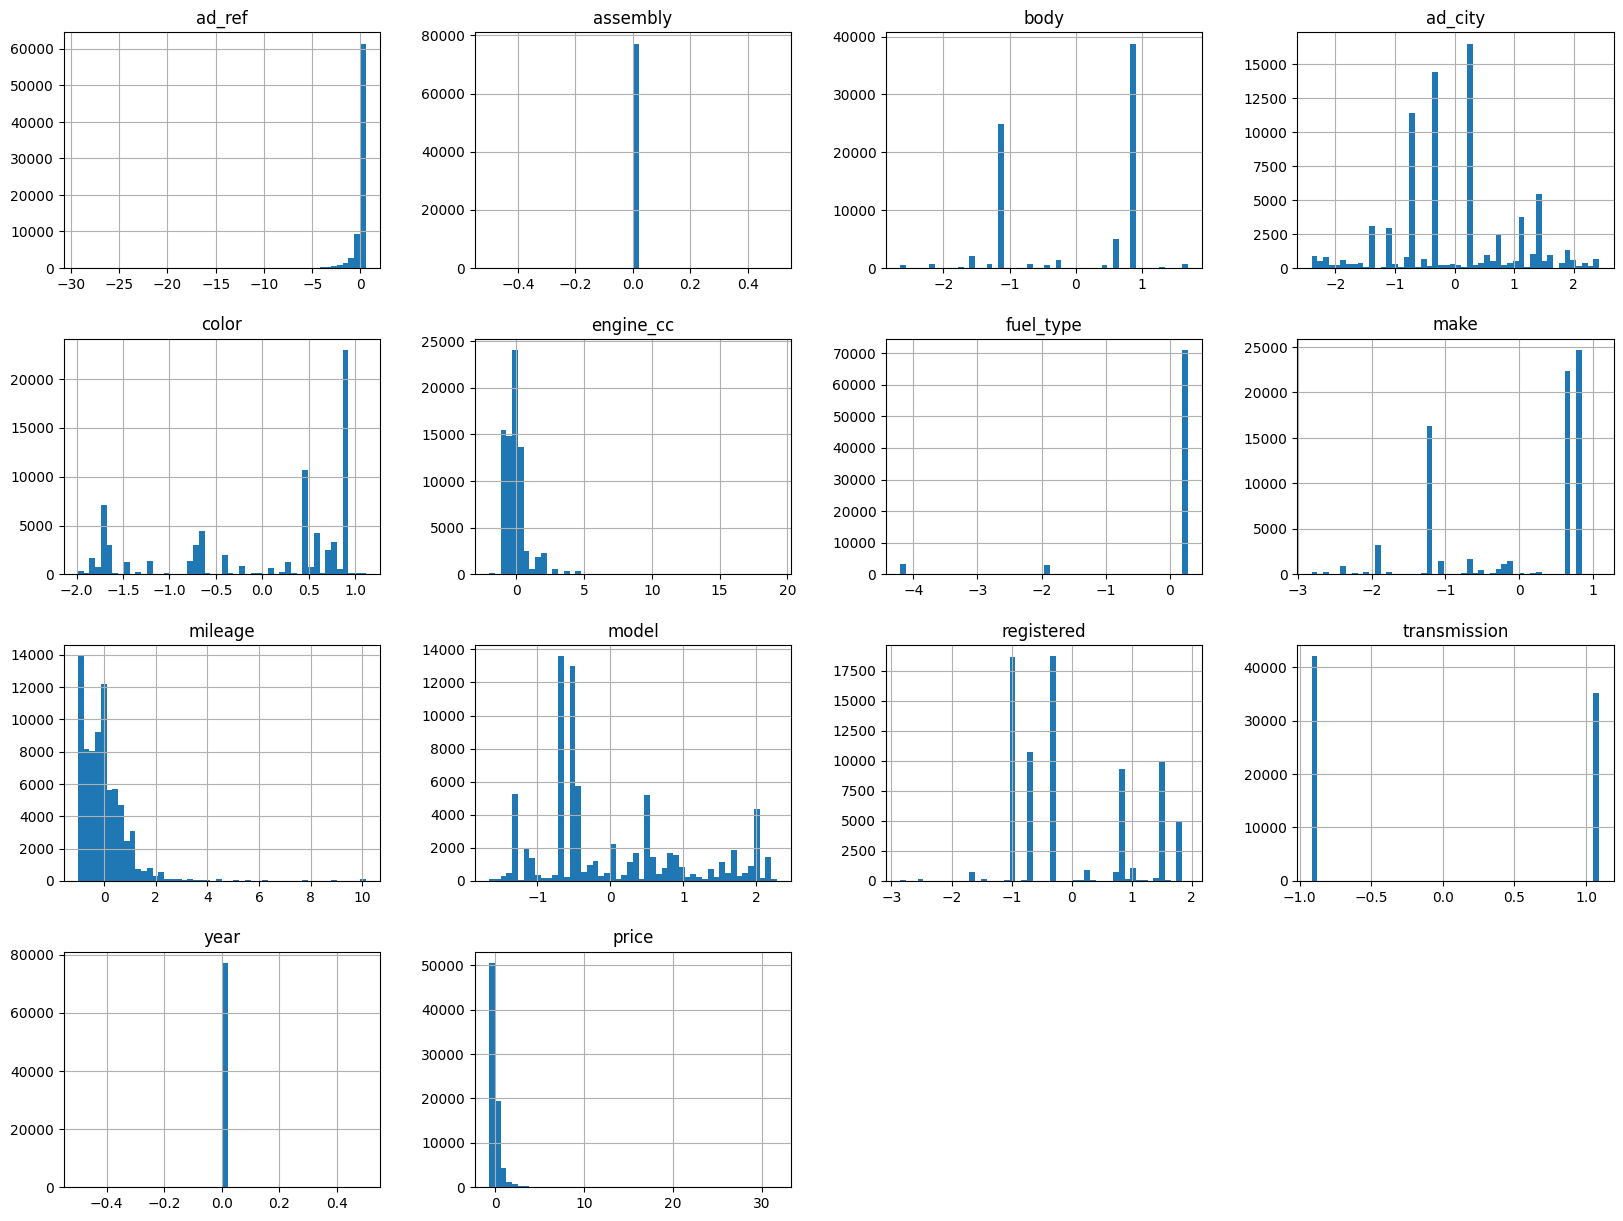

In [64]:
#Histograms: To show the distribution of individual features.
dataset.hist(bins=50,figsize=(20,15))
plt.show()

**Histogram**

* A *histogram* is a graphical representation that displays the distribution of a numerical dataset.

* It is a type of bar chart that shows the frequency or count of data points within different, non-overlapping intervals or "bins".


* The hist() method in Pandas is designed to create histograms for numerical columns in a DataFrame. It does not automatically handle categorical features, as histograms are not an appropriate visualization for categorical data.


Scatter Plots For ad_ref
--------------------------------------------------


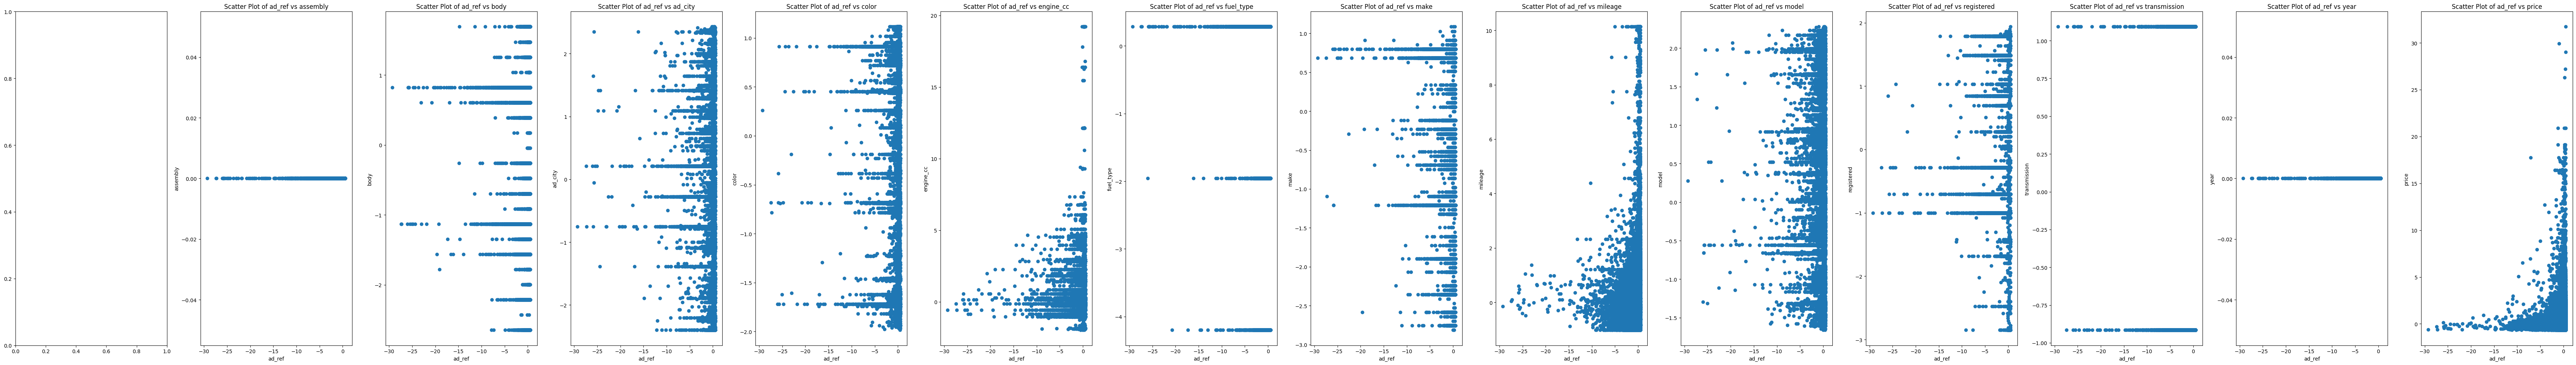

Scatter Plots For assembly
--------------------------------------------------


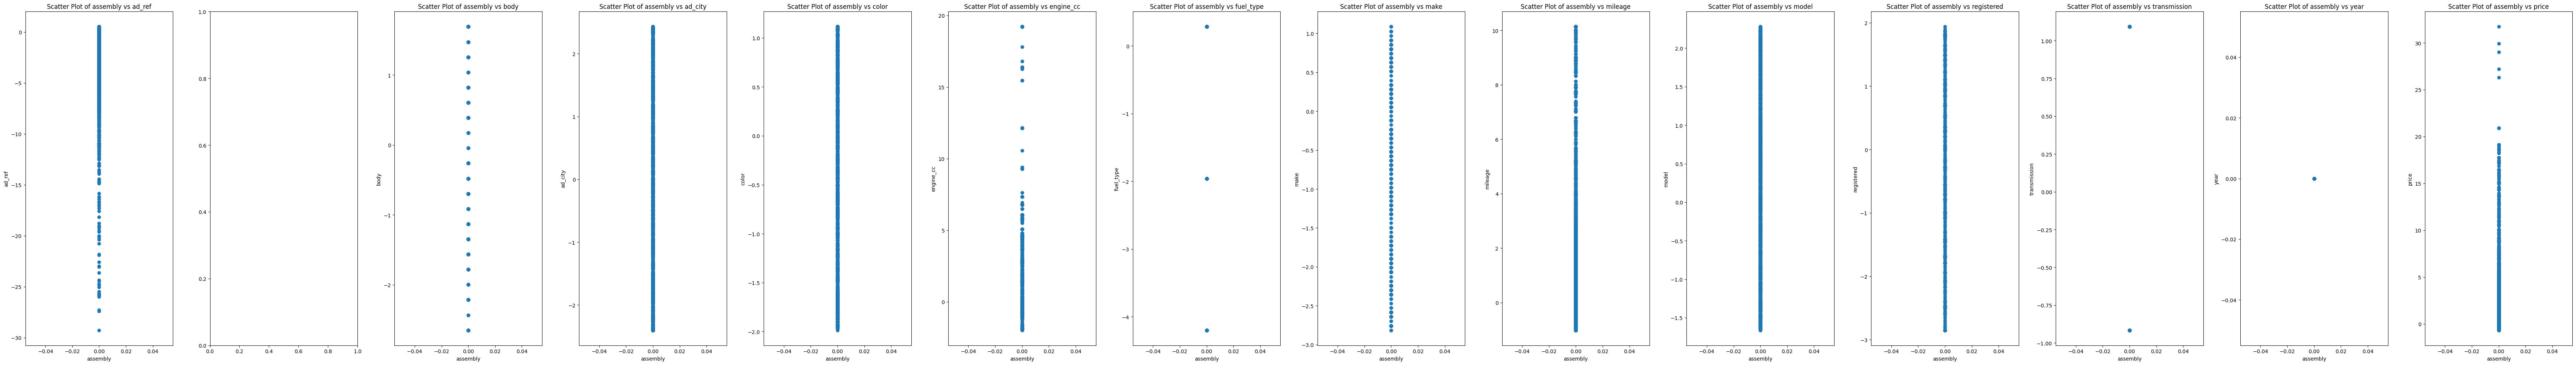

Scatter Plots For body
--------------------------------------------------


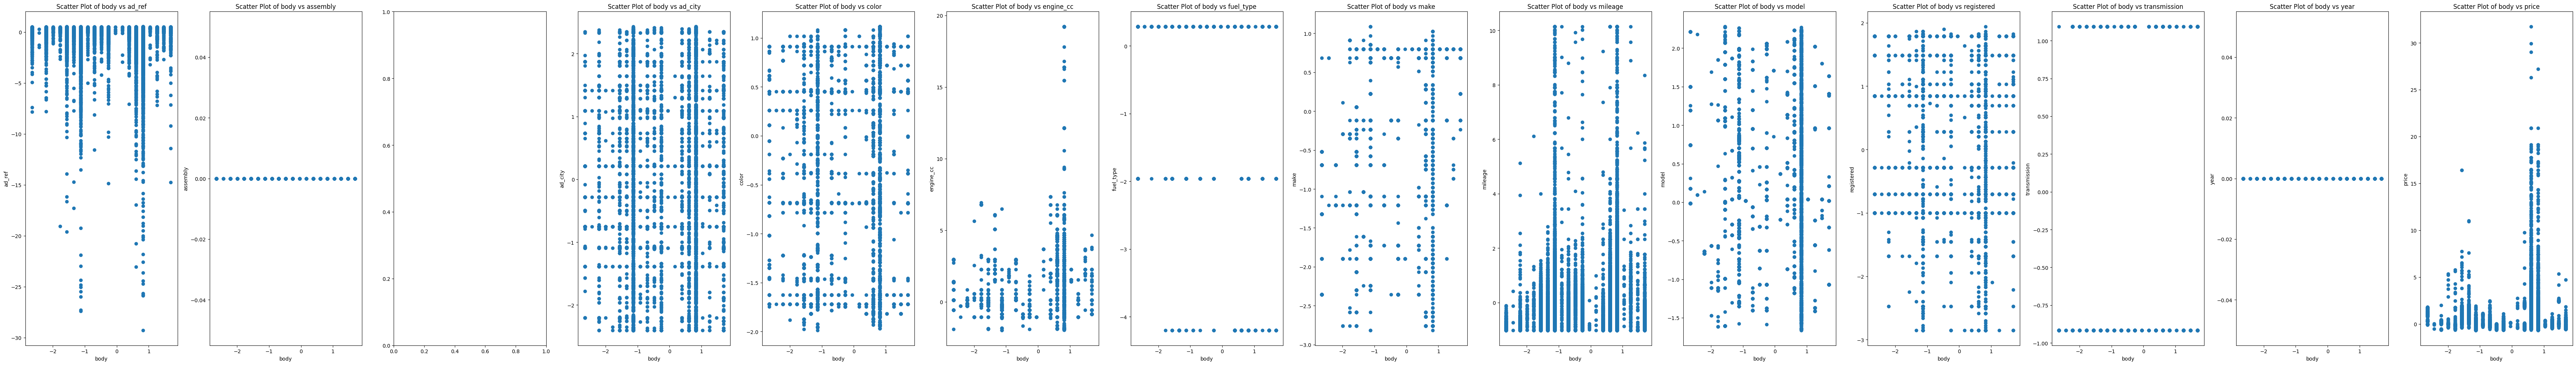

Scatter Plots For ad_city
--------------------------------------------------


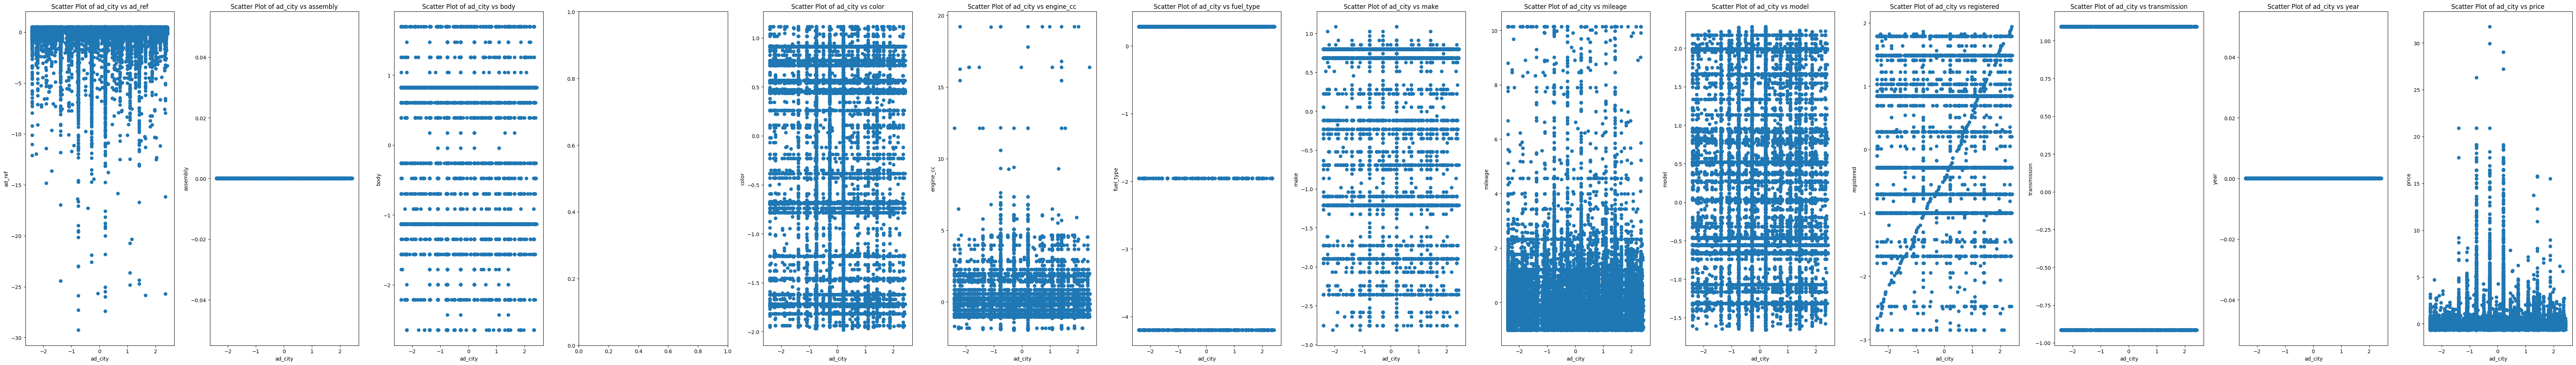

Scatter Plots For color
--------------------------------------------------


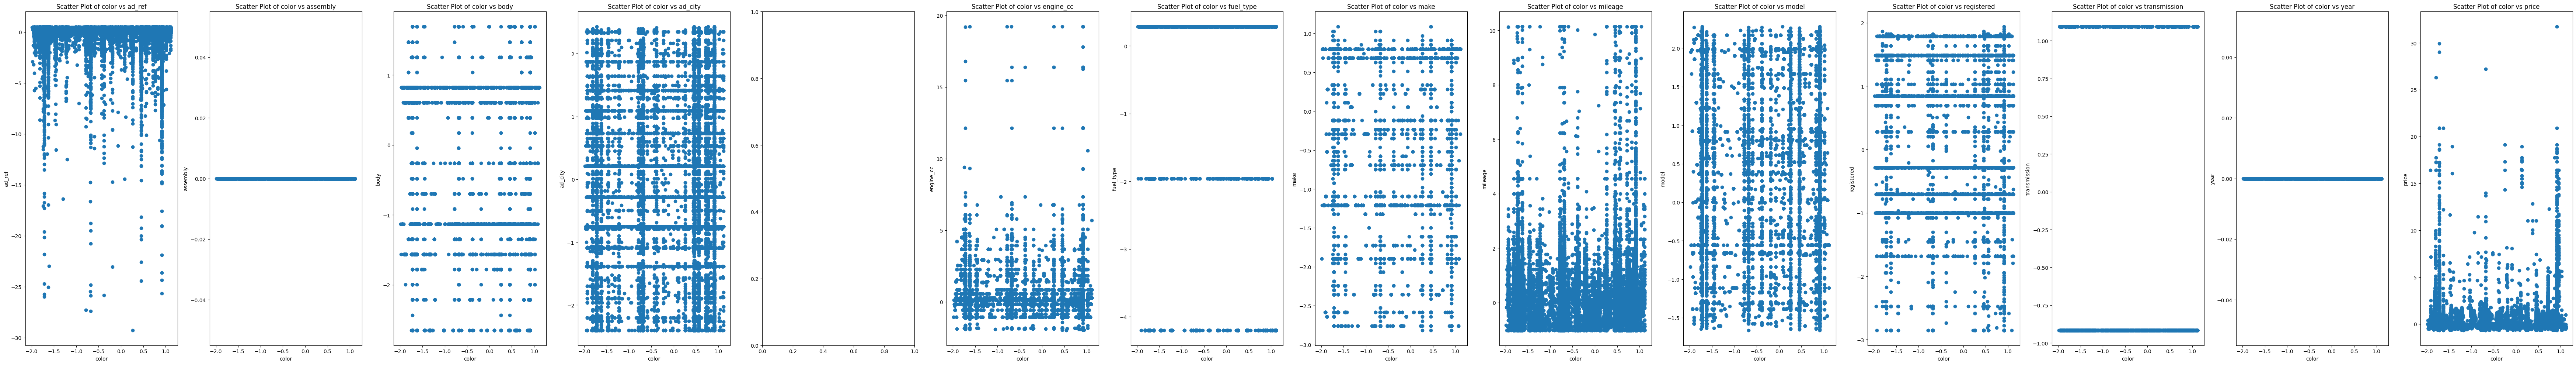

Scatter Plots For engine_cc
--------------------------------------------------


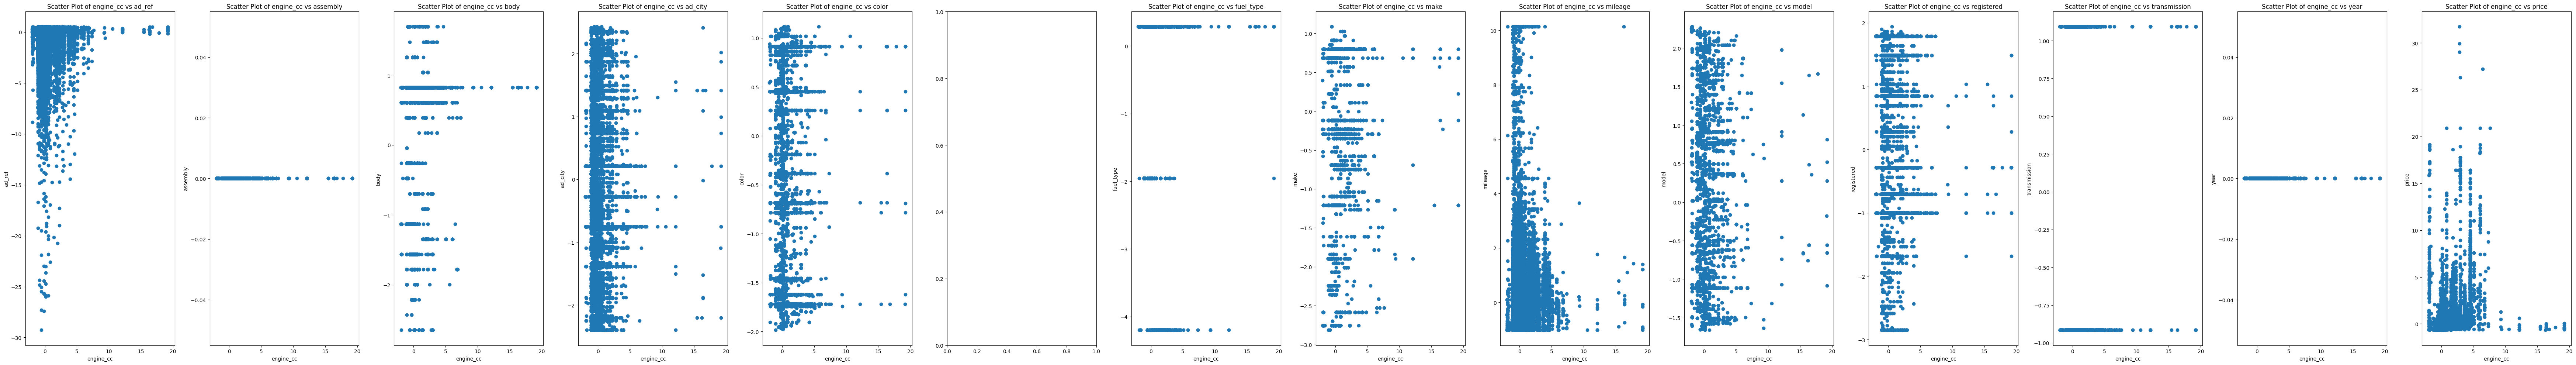

Scatter Plots For fuel_type
--------------------------------------------------


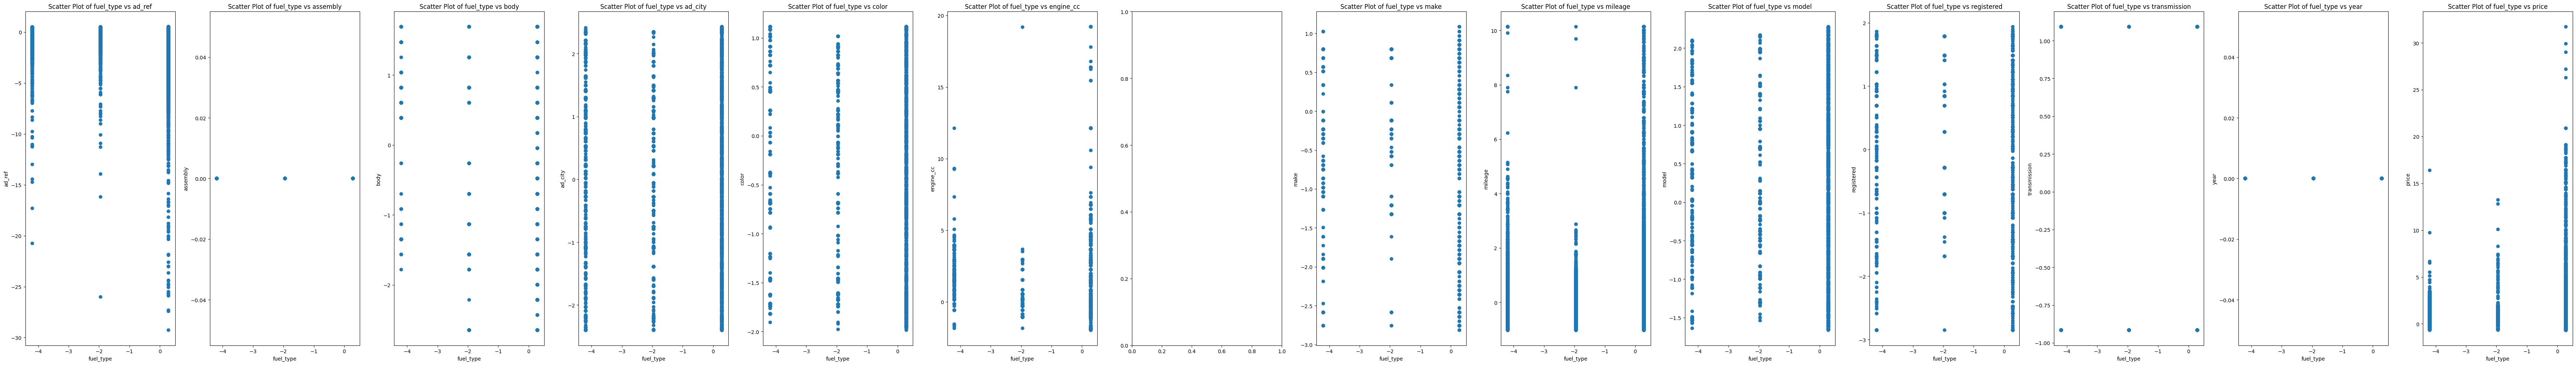

Scatter Plots For make
--------------------------------------------------


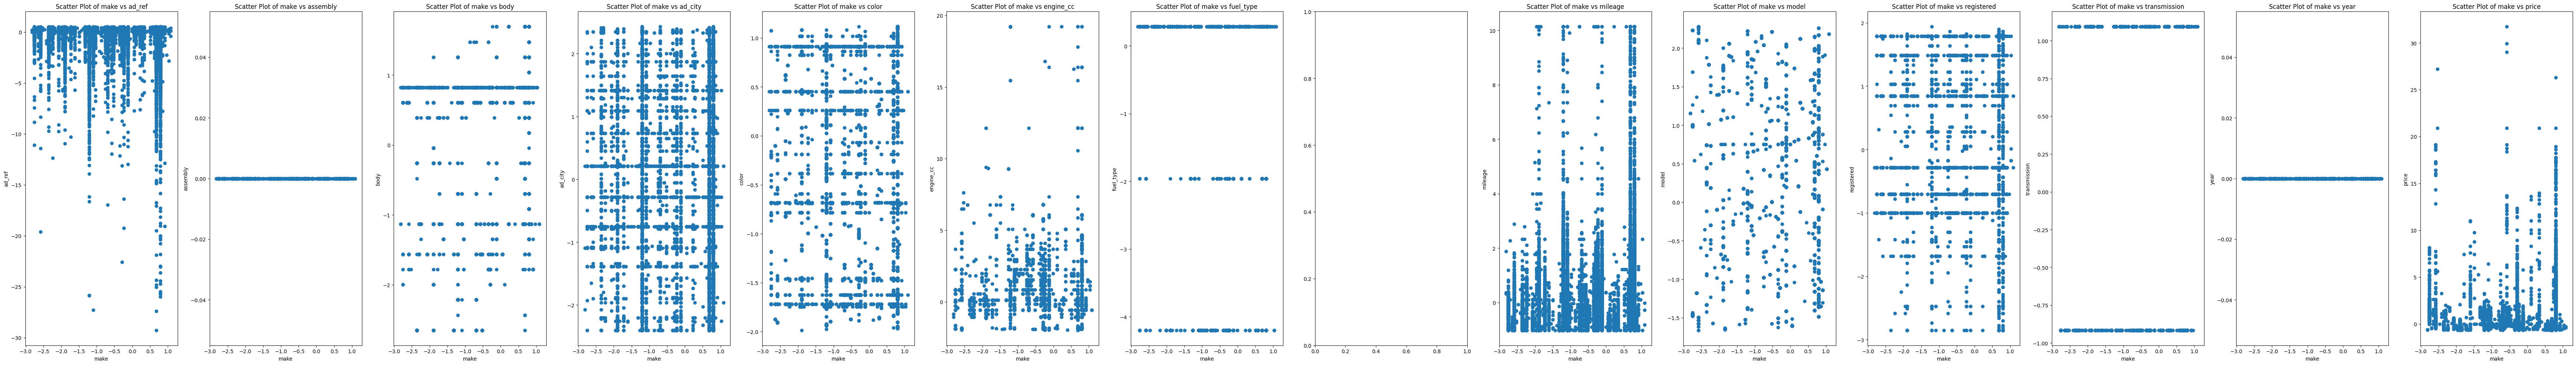

Scatter Plots For mileage
--------------------------------------------------


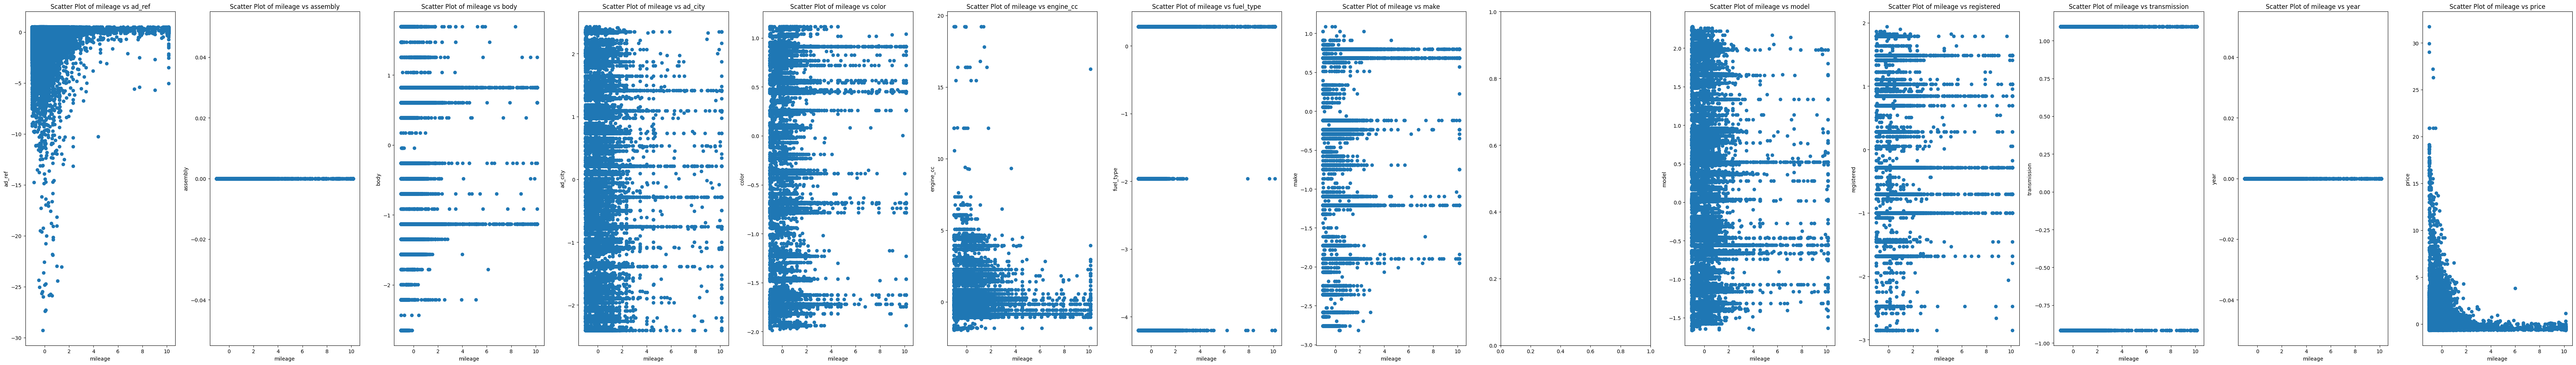

Scatter Plots For model
--------------------------------------------------


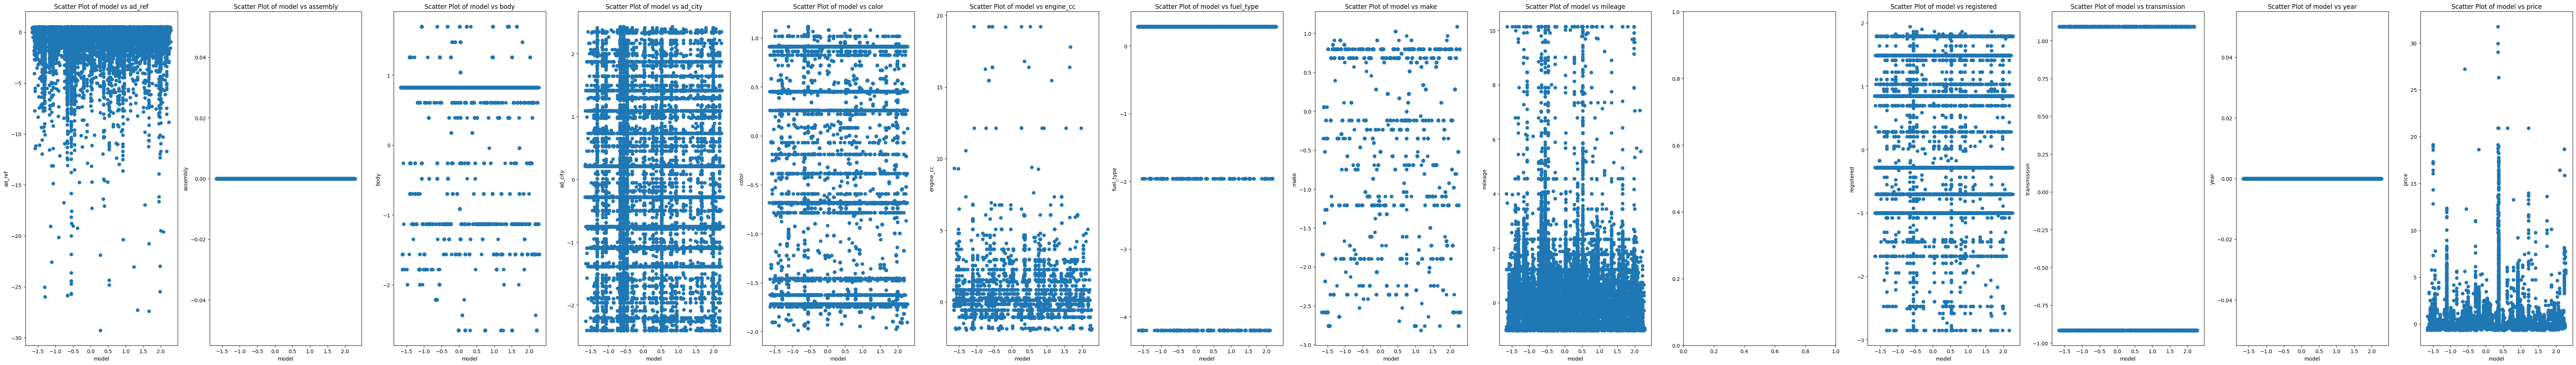

Scatter Plots For registered
--------------------------------------------------


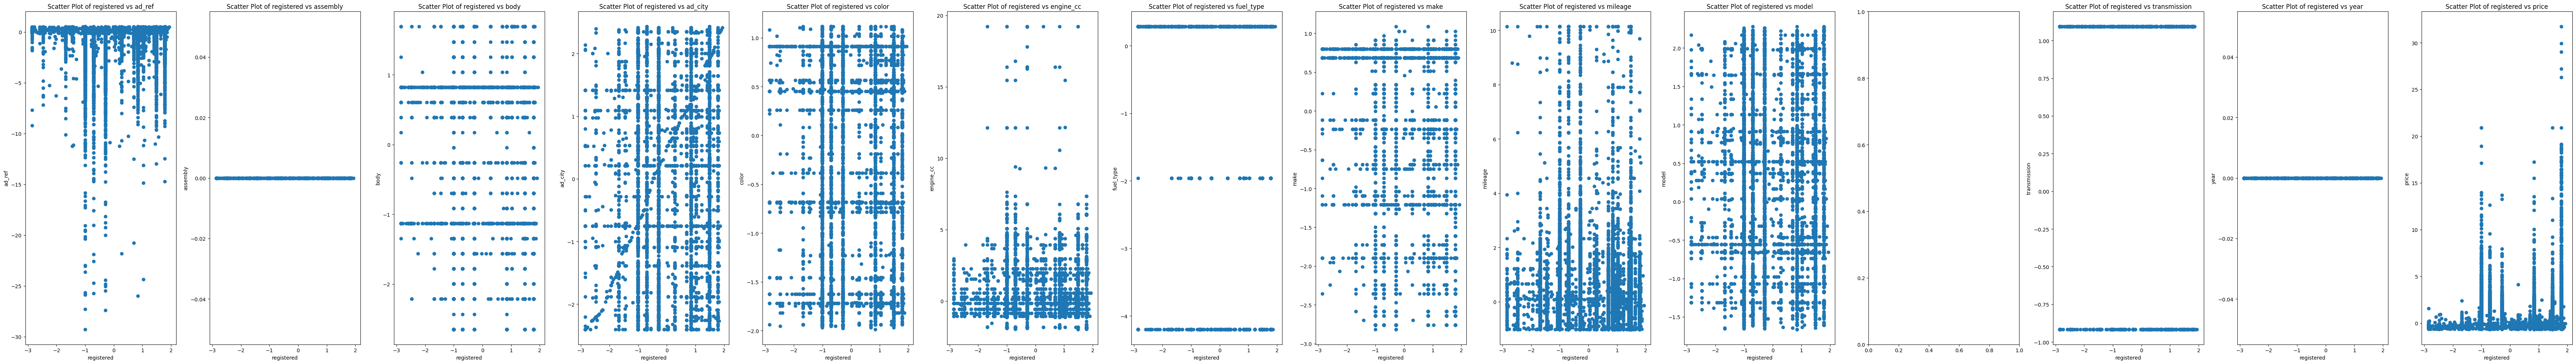

Scatter Plots For transmission
--------------------------------------------------


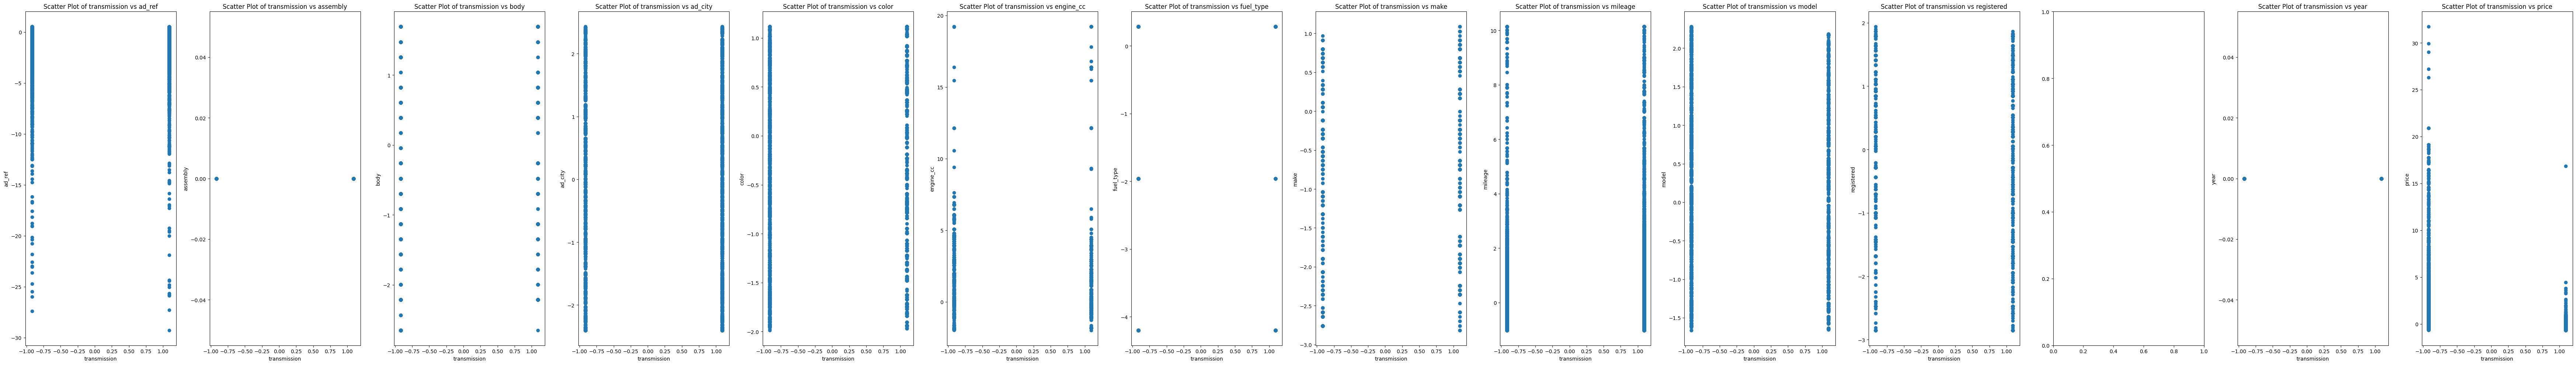

Scatter Plots For year
--------------------------------------------------


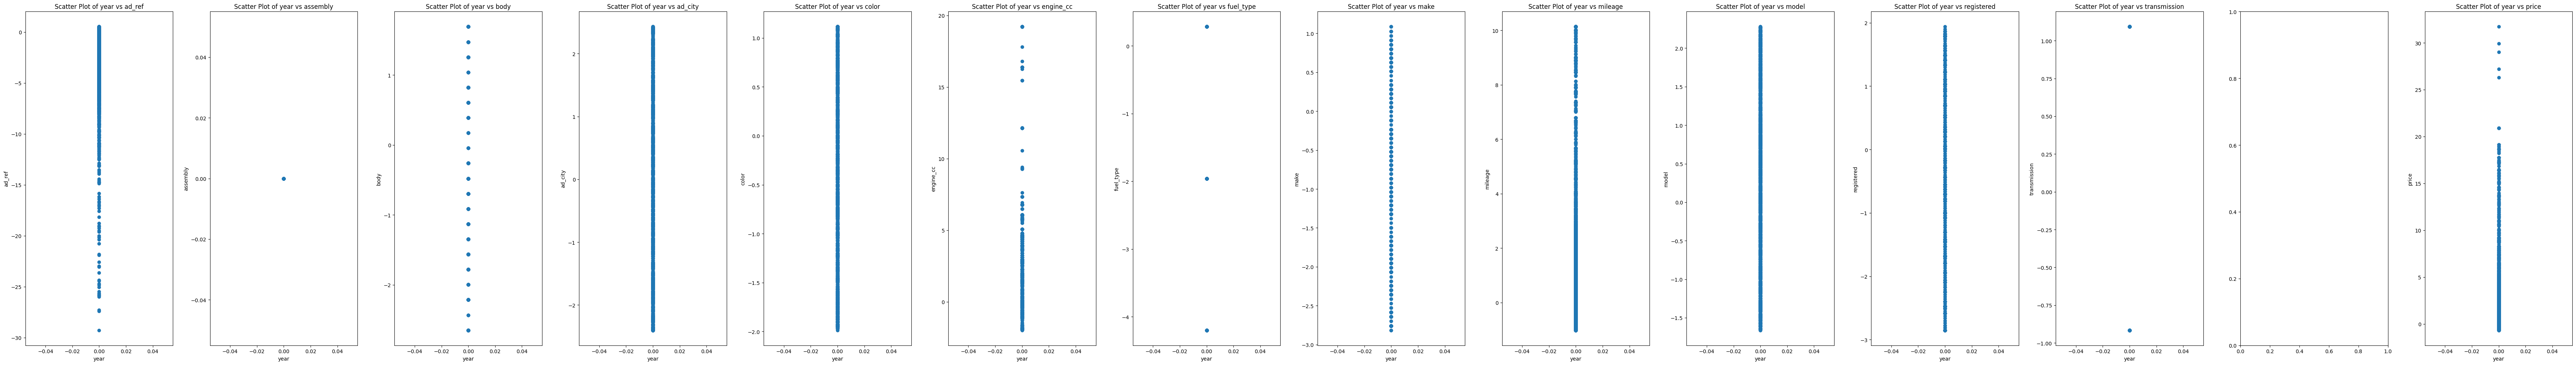

Scatter Plots For price
--------------------------------------------------


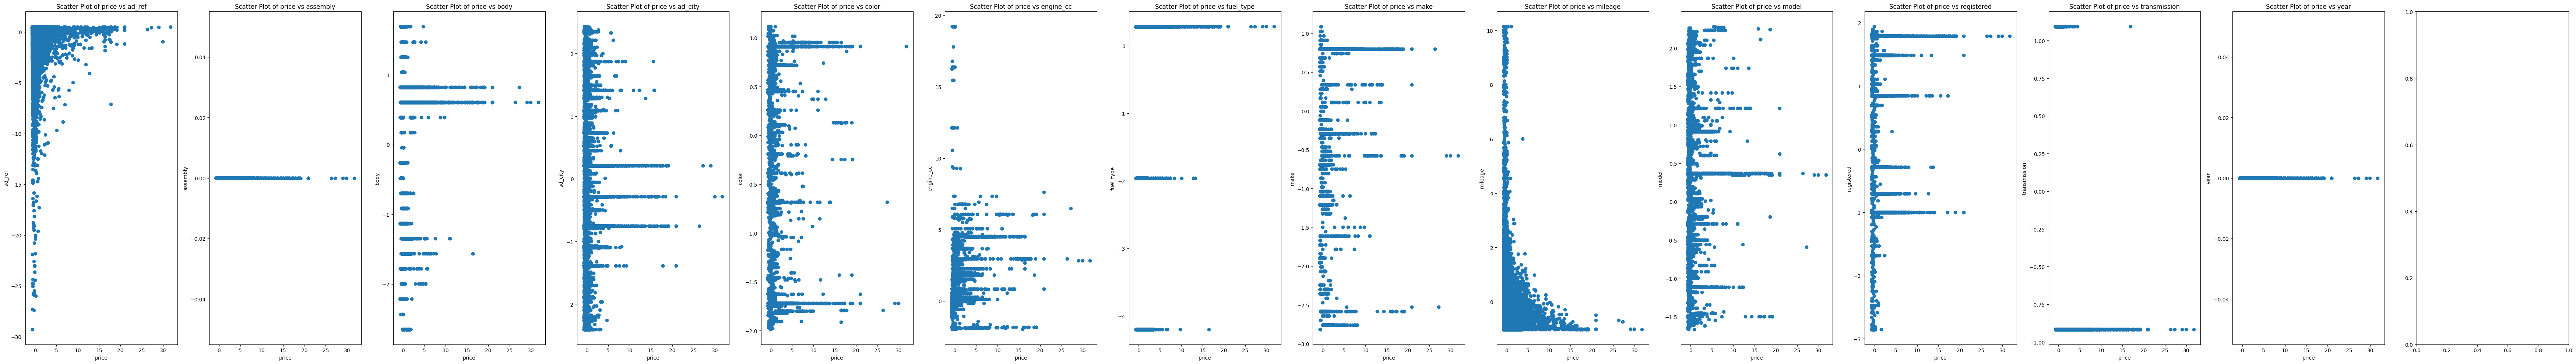

In [66]:
#Scatter Plots: To show relationships between pairs of features.:

for col in dataset.columns:
    print(f'Scatter Plots For {col}')
    print('-'*50)
    fig, axes = plt.subplots(1, 14, figsize=(70, 10))

    for i, y_feature in enumerate(dataset.columns):
      if col == y_feature:
        continue
      else:
        axes[i].scatter(dataset[col] , dataset[y_feature])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(y_feature)
        axes[i].set_title(f'Scatter Plot of {col} vs {y_feature}')
    fig.subplots_adjust(hspace=10.0, wspace=10.0)
    plt.tight_layout()
    plt.show()


**Scatter Plots**

* Scatter plots are a data visualization technique that displays the relationship between two numerical variables. They represent each data point as a single point on a graph, with one variable on the x-axis and the other on the y-axis.


**Key features of scatter plots**:

* **Correlation visualization**: The distribution of points reveals the strength and direction of the correlation between the variables.
* **Positive, negative, and no correlation**: Upward/downward trends indicate positive/negative correlation, while random scattering indicates no correlation.
* **Outlier identification**: Scatter plots can help identify data points that deviate significantly from the overall pattern.
* **Exploratory data analysis**: Scatter plots are widely used in the EDA phase to gain insights into variable relationships.
* **Regression analysis**: Scatter plots can be used to fit regression lines to model the relationship between variables.

The Box Plot for ad_ref is --------------------------------------------------


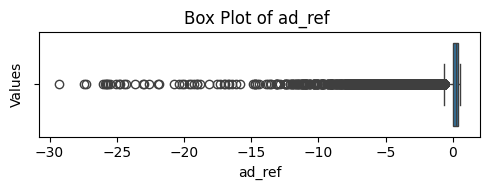

The Box Plot for assembly is --------------------------------------------------


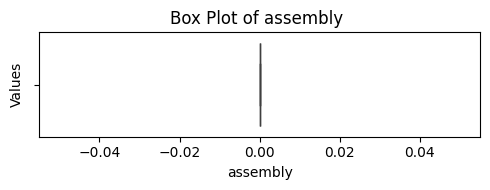

The Box Plot for body is --------------------------------------------------


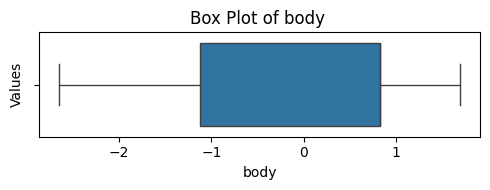

The Box Plot for ad_city is --------------------------------------------------


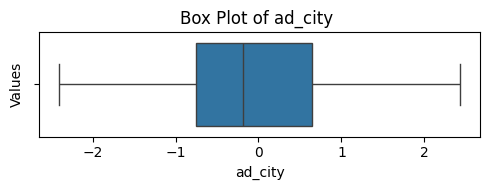

The Box Plot for color is --------------------------------------------------


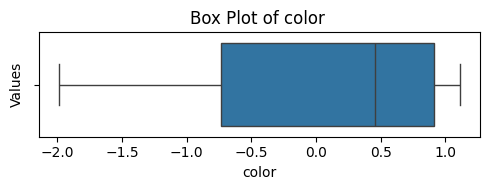

The Box Plot for engine_cc is --------------------------------------------------


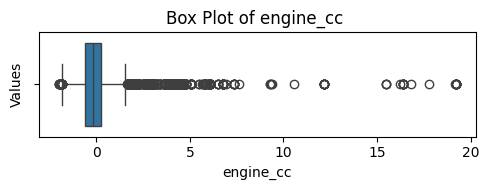

The Box Plot for fuel_type is --------------------------------------------------


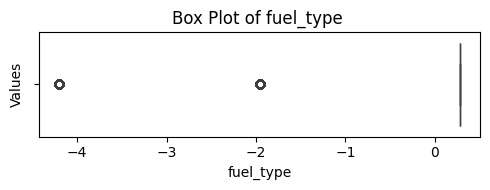

The Box Plot for make is --------------------------------------------------


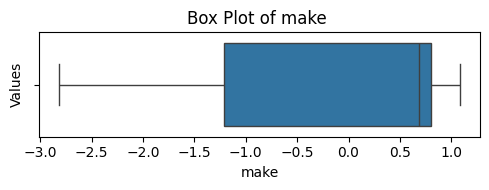

The Box Plot for mileage is --------------------------------------------------


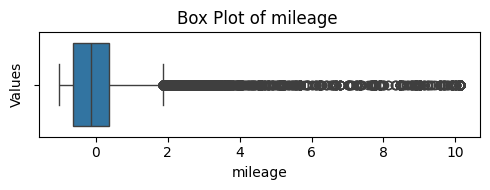

The Box Plot for model is --------------------------------------------------


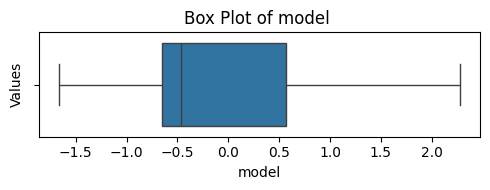

The Box Plot for registered is --------------------------------------------------


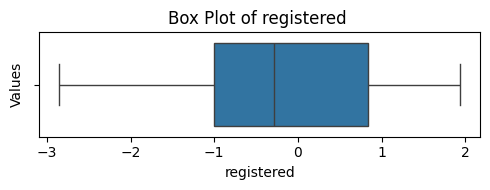

The Box Plot for transmission is --------------------------------------------------


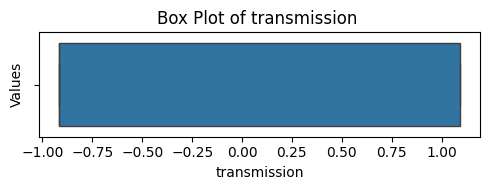

The Box Plot for year is --------------------------------------------------


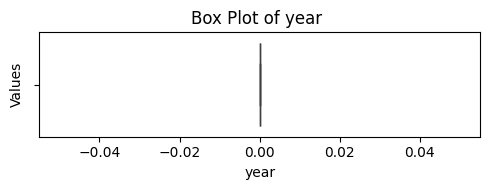

The Box Plot for price is --------------------------------------------------


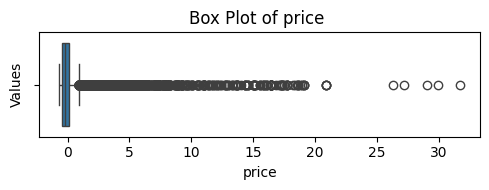

In [71]:
#Box Plots: To identify outliers and understand the spread of data.
for i,col in enumerate(dataset.columns):
  print(f"The Box Plot for {col} is {'-'*50}")
  fig = plt.subplots(figsize=(5,2))

  sns.boxplot(x=col,data=dataset)
  plt.xlabel(col)
  plt.ylabel("Values")
  plt.title(f'Box Plot of {col} ')


  plt.tight_layout()
  plt.show()

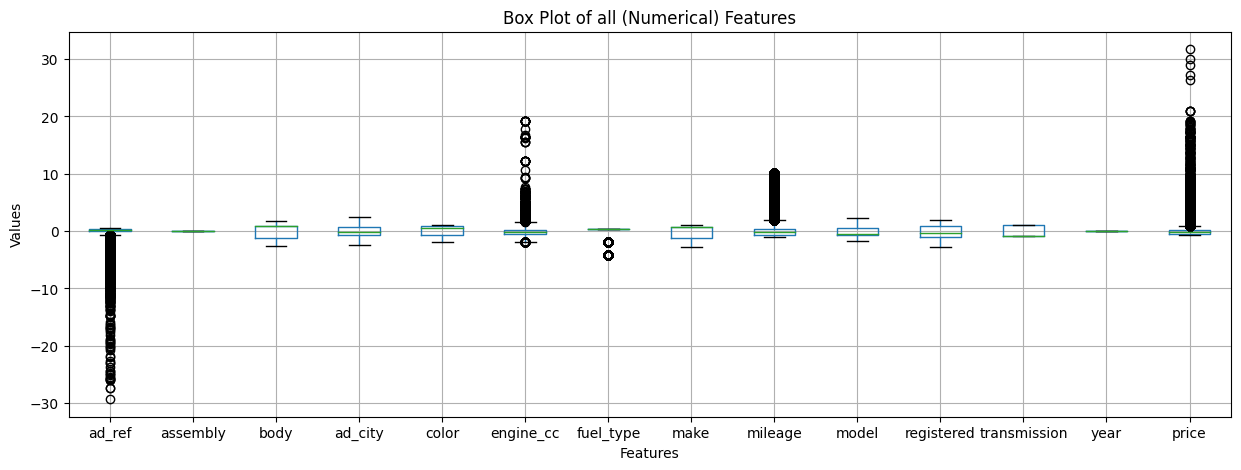

In [73]:
#Box Plots: To identify outliers and understand the spread of data.

dataset.boxplot(figsize=(15,5))
plt.title("Box Plot of all (Numerical) Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

 **Box Plot**


---



 * Box plot ,also known as a box-and-whisker plot
 * is a graphical representation of a dataset
 * that summarizes key statistics, including the median, quartiles, and outliers.
 * It is used to visualize the distribution of numerical data and to identify potential outliers.

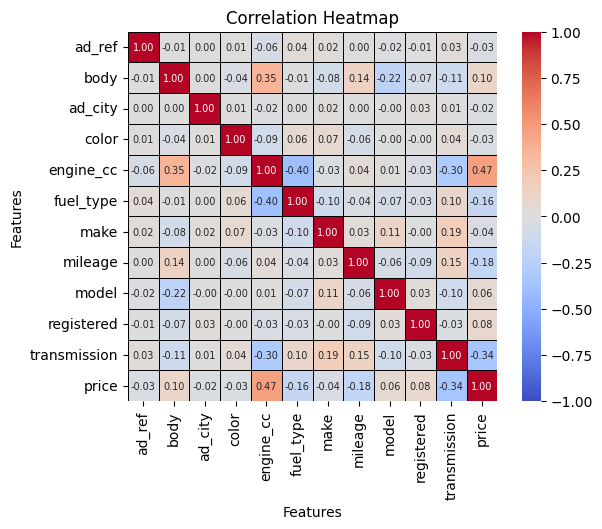

<Figure size 1000x1000 with 0 Axes>

In [79]:
#Correlation Heatmaps: To visualize correlations between features.
sns.heatmap(cor_mat, annot=True, annot_kws={'fontsize':7} ,cmap='coolwarm', fmt='.2f', robust=True, square=True, center=0 , linewidths=0.5, linecolor='Black',vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.figure(figsize=(10,10))
plt.show()

**Correlation Heatmaps**


---


* Correlation Heatmaps are a data visualization technique used to display the correlation between multiple variables in a dataset.

>> The key features of correlation heatmaps are:
* **Correlation Matrix**: The heatmap is based on a correlation matrix, which is a table that shows the pairwise correlation coefficients between all the variables in the dataset.
* **Color Coding**: The correlation values are represented using a color scale, where the color of each cell in the heatmap corresponds to the strength and direction of the correlation between the two variables.
* **Strength of Correlation**: Stronger positive correlations are typically represented by warm colors like red or orange, while stronger negative correlations are represented by cool colors like blue. The intensity of the color indicates the magnitude of the correlation.
* **Visualization of Patterns**: The heatmap allows you to quickly identify patterns and relationships between variables. Areas of the heatmap with similar colors indicate groups of variables that are highly correlated with each other.
* **Identification of Outliers**: Outlier variables that have weak or no correlation with the rest of the variables can be easily spotted in the heatmap.




# ***Report: Analysis of Used Car Data***
---
1. **Introduction**

    This report presents the analysis of a dataset containing information on used cars from Pakistan.
        The dataset contains 77,237 rows and 14 columns,
        encompassing details about the car's ad reference, assembly, body type, city, color, engine capacity (cc), fuel type, make, mileage, model, registration, transmission, year, and price.
    
    Main Objective of this analysis:

       The main objective of this analysis is to
              explore the data,
              clean it for further modeling,
              derive insights from it.
    
    The findings will be helpful for :
             > understanding the used car market in Pakistan,
             > identifying key patterns and correlations
             > potentially informing future model development.

2. **Data Cleaning and Preparation**

    **Initial Step**

          The initial step involved loading the dataset and examining its structure.
          This revealed that the dataset contains missing values in several columns, specifically in
              "assembly"
              "body"
              "color"
              "fuel_type"
              "year"
              "price".
          
**Handling Missing Values**
---
**Identifying Missing Values:**

    We identified the total number of missing values in each column and row.
    
        The column "assembly" has the highest number of missing values (53,261),
        followed by "body" (8,865) and "fuel_type" (934).
    
    In terms of rows,
    
        there are 649 rows with missing values in the "price" column
        two rows with missing values in the "engine_cc" column.

**Addressing Missing Values:**

We employed two methods for handling missing values:

    >> Dropping Rows with Missing Values:

        This involved removing rows containing any missing values.
        This resulted in a significant reduction in the dataset size, from 77,237 rows to 16,168 rows,
        representing a loss of 79.05% of the data.

    While this approach is simple,
    it can lead to a loss of valuable information and potentially impact the accuracy of any subsequent models.

    >> Filling Missing Values:

      Instead of dropping rows, we filled in missing values based on the column type.

          For categorical columns,
            we replaced missing values with the most frequently occurring value in the column.
          For numerical columns,
            we replaced missing values with the mean value of the respective column.
      This approach preserved the size of the dataset and minimized information loss.

3. **Data Transformation:**
---

    The dataset contained categorical features such as "assembly", "body", "ad_city", "color", "fuel_type", "make", "model", "registered", and "transmission".
    To use these features in machine learning models,
          we transformed them into numerical values using Label Encoding.
          This approach maps each unique category in a column to a unique integer value.
    
    The numerical features were "engine_cc", "mileage", "year", and "price"
    
          They were standardized using StandardScaler.
          This process ensures that each feature has a zero mean and unit variance,
          which is beneficial for certain machine learning algorithms.

4. **Data Analysis and Visualization**
---
    After cleaning and preparing the data,
    we performed
          exploratory data analysis (EDA)
          visualization
    to gain insights from the dataset.

**Summary Statistics:**

    We generated summary statistics for all columns, providing measures of
          central tendency (mean, median)
          dispersion (standard deviation).
    This revealed:

      >> Engine Capacity (cc):
            The mean engine capacity is 1406 cc,
            with a standard deviation of 707 cc.
            The maximum engine capacity is 15,000 cc,
            while the minimum is 3 cc.


      >> Mileage:
            The average mileage is 91,296 km,
            with a standard deviation of 89,705 km.
            The maximum mileage is 1,000,000 km,
            while the minimum is 1 km.


      >> Price:
            The mean price is 3,854,193 PKR,
            with a standard deviation of 5,576,970 PKR.
            The maximum price is 180,000,000 PKR,
            while the minimum is 120,000 PKR.


**Correlation Matrix:**

    We calculated the correlation matrix to identify relationships between different features.
    The analysis revealed:

        >> Strongest Positive Correlation:

              A strong positive correlation exists between "engine_cc" and "price" (0.467),
              indicating that cars with larger engine capacities tend to have higher prices.

        >>Strongest Negative Correlation:

              The strongest negative correlation is observed between "fuel_type" and "engine_cc" (-0.397),
              suggesting that cars with larger engine capacities are less likely to be powered by petrol.

        >> Weakest Correlation:
              The weakest correlation is observed between "model" and "engine_cc" (0.013),
              indicating a negligible relationship between the car model and its engine capacity.


**Analyzing Categorical Columns:**

      We examined the value counts for categorical columns, identifying the most frequent combinations of attributes. The analysis revealed:

      >> Most Frequent Combination:
      
      The most frequent combination of attributes is      
        "Imported, Hatchback, Karachi, Silver, Petrol, Toyota, Vitz, Karachi, Automatic", with a count of 46,
        
        indicating a strong preference for hatchback cars from Toyota, specifically Vitz models, with a silver color and petrol engine, sold in Karachi and registered automatically.


    >>Other Common Combinations:

        Other common combinations include
        
        "Imported, Hatchback, Islamabad, Silver, Petrol, Toyota, Vitz, Islamabad, Automatic", "Imported, Hatchback, Karachi, Silver, Petrol, Daihatsu, Mira, Karachi, Automatic"
        
        and
        
        "Imported, Hatchback, Lahore, Silver, Petrol, Toyota, Vitz, Lahore, Automatic".

    >> Total Unique Combinations:

        The total number of unique combinations of categorical variables in the dataset is 10,675,
        highlighting the diversity of car configurations available in the market.


**Visualizations:**
---

    We created
          histograms,
          scatter plots
          box plots
    to visually represent the data distribution and relationships between features:

>>Histograms:

    Histograms displayed the distribution of individual numerical features,
    highlighting the shape of the distributions and any potential outliers.


>> Scatter Plots:

    Scatter plots visualized relationships between pairs of features,
    allowing for the identification of linear or non-linear correlations, clusters, and outliers.


>> Box Plots:

    Box plots provided a visual summary of the distribution of numerical features,
    showing the median, quartiles, and potential outliers.


>> Correlation Heatmap:

    A correlation heatmap provided a comprehensive visual representation of correlations between all numerical features.
    It revealed patterns of high positive and negative correlations,
    as well as features with low correlations,
    indicating potential outliers.


4. **Conclusion**

---
    The analysis of the used car dataset reveals valuable insights into the used car market in Pakistan.
    
    The strongest correlations were observed between "engine_cc" and "price", as well as "fuel_type" and "engine_cc".
    
    The analysis also highlighted the most frequent combinations of attributes in the dataset, particularly the combination of "Imported, Hatchback, Karachi, Silver, Petrol, Toyota, Vitz, Karachi, Automatic".

   >> These insights can be valuable for stakeholders such as:

    >> Dealers:
        Understanding price trends based on engine capacity and fuel type can inform pricing strategies.
    
    >> Consumers:
        Insights into the most frequent vehicle configurations can guide decision-making when buying a used car.
    
    
 >> Limitations:

    The analysis has limitations, such as
       the missing values
       the incomplete data regarding the car's condition and specific features
    
    Future work could focus on:

     >> Enhancing Data Quality:

          Filling in missing values with more sophisticated techniques,
          such as using imputation algorithms based on machine learning.

    >> Expanding Feature Set:

          Collecting additional data on car features such as condition, model year, and specific equipment,
          to provide a more comprehensive understanding of the market.
    
    >>Building Predictive Models:
    
          Using the clean and prepared dataset to develop predictive models that can estimate the price of used cars based on various features,
          which can be beneficial for both buyers and sellers.
    
    
>> Overall,

    this analysis provides a foundational understanding of the used car market in Pakistan.
    Further exploration and refinement of the dataset,
    along with the development of predictive models,
    can lead to more actionable insights and informed decision-making in this market.